# Image filtering

Diego Torres
Philippe Massouf

In [1]:
from PIL import Image
import numpy as np
from scipy.signal import convolve2d

import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter

In [2]:
# Read image
img = Image.open('../H1/barbara.jpg')

# Take only the first channel
img_array = np.asanyarray(img)[:,:,0]

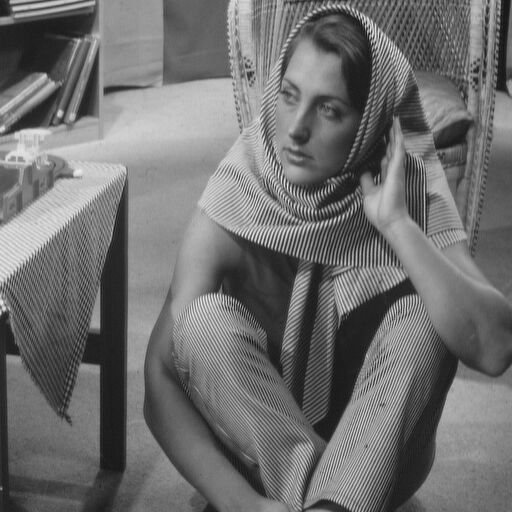

In [3]:
img

## Gradient filter

In [4]:
# Defining the filters

y_comp_filter = np.array([[1],[0],[-1]])

x_comp_filter = np.array([[1,0,-1]])

In [5]:
# Testing with a simple image

test_image = np.zeros((100,100))
test_image[25:75,25:75] = 1

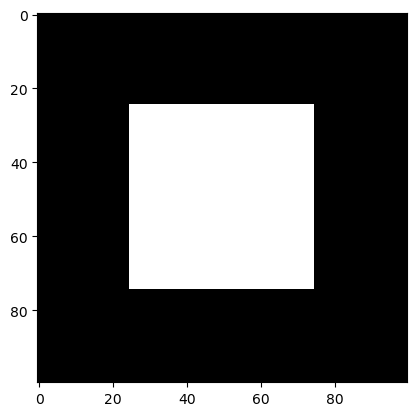

In [7]:
plt.imshow(test_image, cmap='gray')
plt.show()

In [8]:
test_x_comp = convolve2d(test_image, x_comp_filter, mode='same')
test_y_comp = convolve2d(test_image, y_comp_filter, mode='same')

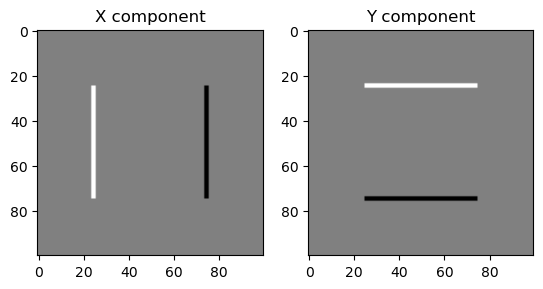

In [23]:
plt.subplot(1,2,1)
plt.imshow(test_x_comp, cmap='gray')
plt.title('X component')

plt.subplot(1,2,2)
plt.imshow(test_y_comp, cmap='gray')
plt.title('Y component')

plt.show()

Indeed, we see that by applying this filter we recover what we would expect as the gradient of this very basic image. There is a positive gradient in the x direction on the left edge of the square (when going from black to white), and negative one on the right side (white to black). Something similar happens in the y component, but with the upper and lower edges respectively.

In [10]:
# Applying it on the image

x_comp = convolve2d(img_array, x_comp_filter, mode='same')

y_comp = convolve2d(img_array, y_comp_filter, mode='same')

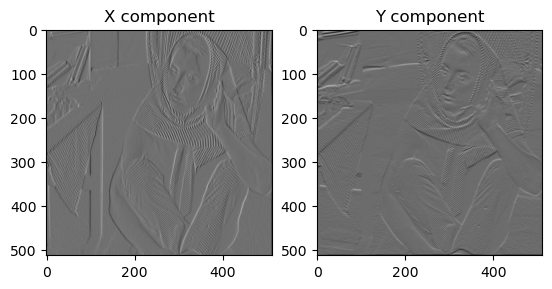

In [22]:
plt.subplot(1,2,1)
plt.imshow(x_comp, cmap='gray')
plt.title('X component')

plt.subplot(1,2,2)
plt.imshow(y_comp, cmap='gray')
plt.title('Y component')

plt.show()

In [12]:
angle = np.arctan2(y_comp, x_comp)

magnitude = np.sqrt(x_comp**2 + y_comp**2)

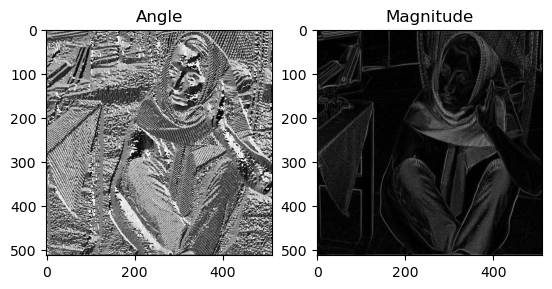

In [21]:
plt.subplot(1,2,1)
plt.imshow(angle, cmap='gray')
plt.title('Angle')

plt.subplot(1,2,2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude')

plt.show()

## Sobel filter

The Sobel filter can be interpreted as a smooth version of the gradient.
https://en.wikipedia.org/wiki/Sobel_operator

In [14]:
Gx_filter = np.array([[1,0,-1],
                      [2,0,-2],
                      [1,0,-1]])

Gy_filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [15]:
# Applying it on the image

x_comp = convolve2d(img_array, Gx_filter, mode='same')

y_comp = convolve2d(img_array, Gy_filter, mode='same')

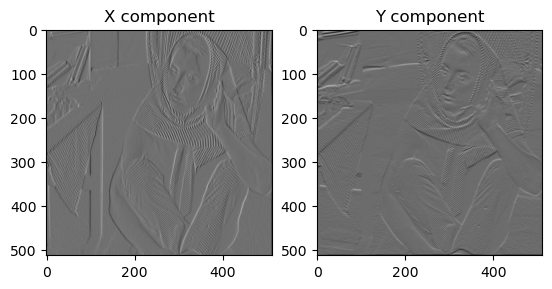

In [20]:
plt.subplot(1,2,1)
plt.imshow(x_comp, cmap='gray')
plt.title('X component')

plt.subplot(1,2,2)
plt.imshow(y_comp, cmap='gray')
plt.title('Y component')

plt.show()

In [17]:
angle = np.arctan2(y_comp, x_comp)

magnitude = np.sqrt(x_comp**2 + y_comp**2)

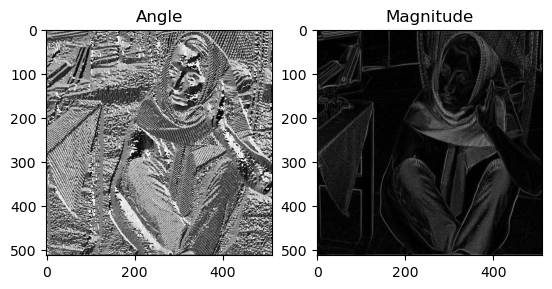

In [19]:
plt.subplot(1,2,1)
plt.imshow(angle, cmap='gray')
plt.title('Angle')

plt.subplot(1,2,2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude')

plt.show()

## Average filter

In [24]:
def avg_img(img, size=3):
    avg_filter = np.ones((size,size))/(size**2)
    return convolve2d(img, avg_filter, mode='same')

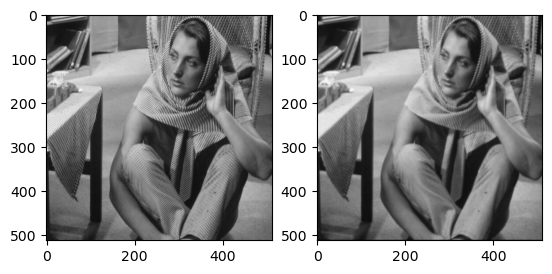

In [26]:
# Size = 3

avg_img_3 = avg_img(img_array, size=3)

plt.subplot(1,2,1)
plt.imshow(img_array, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(avg_img_3, cmap='gray')

plt.show()

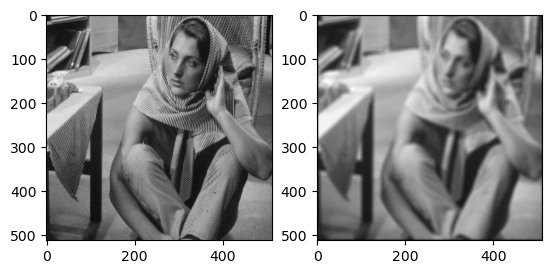

In [28]:
# Size = 10

avg_img_10 = avg_img(img_array, size=10)

plt.subplot(1,2,1)
plt.imshow(img_array, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(avg_img_10, cmap='gray')

plt.show()

We can see explicitly that a bigger averaging filter results in a stronger blur effect.

## Gaussian Filter

We experiment with 3 different gaussian filters, each with a unique shape. The first one is circular with a standard deviation of 10, which means that both the x and y axis share this value. The other two have standard deviation of 10 for one axis and 1 for the other one. 

In [29]:
circular_filtered_img = gaussian_filter(img_array, sigma=10)

vertical_filtered_img = gaussian_filter(img_array, sigma=(1,10))

horizontal_filtered_img = gaussian_filter(img_array, sigma=(10,1))

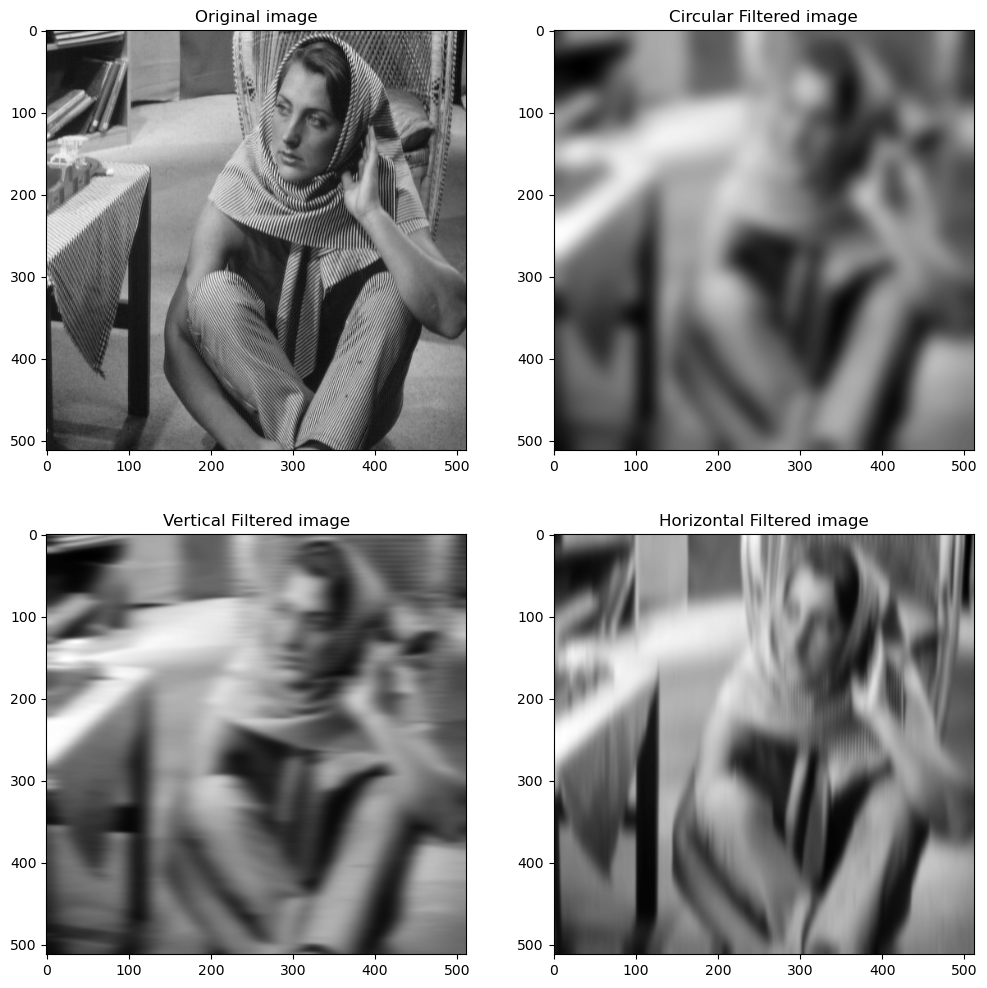

In [31]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(img_array, cmap='gray')
plt.title('Original image')

plt.subplot(2,2,2)
plt.imshow(circular_filtered_img, cmap='gray')
plt.title('Circular Filtered image')

plt.subplot(2,2,3)
plt.imshow(vertical_filtered_img, cmap='gray')
plt.title('Vertical Filtered image')

plt.subplot(2,2,4)
plt.imshow(horizontal_filtered_img, cmap='gray')
plt.title('Horizontal Filtered image')

plt.show()

We first remark that the Gaussian filter with an std of 10 has a very strong blur effect, more than that of the simple averaging filter of size 10. More interestingly, we can see that the effect of the more vertically spread filter can be interpreted by humans as a horizontal shaking in the camera. Similarly, the horizontally spread filter gives the effect of a vertical shaking.